In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn

seaborn.set_theme()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)
pd.set_option('display.max_colwidth', 5000)

# 1. Load the Goldstandard Batches

In [2]:
# Load the previously generated two goldstandard batches
abs_path = '../data/gui_ranking/mturk/'

goldstandard_batch_1 = pd.read_csv(abs_path+"goldstandard_batch_1/06_final_dataset/goldstandard_batch_1.csv")
goldstandard_batch_2 = pd.read_csv(abs_path+"goldstandard_batch_2/06_final_dataset/goldstandard_batch_2.csv")

goldstandard_batch_1_full = pd.read_csv(abs_path+"goldstandard_batch_1/06_final_dataset/goldstandard_batch_1_full.csv")
goldstandard_batch_2_full = pd.read_csv(abs_path+"goldstandard_batch_2/06_final_dataset/goldstandard_batch_2_full.csv")

goldstandard_batch = pd.concat([goldstandard_batch_1, goldstandard_batch_2])
goldstandard_batch_full = pd.concat([goldstandard_batch_1_full, goldstandard_batch_2_full])

goldstandard_batch['annotations_list'] = goldstandard_batch['annotations_list'].apply(literal_eval)
goldstandard_batch['gui_indexes_list'] = goldstandard_batch['gui_indexes_list'].apply(literal_eval)
goldstandard_batch['relevance'] = goldstandard_batch['relevance'].apply(literal_eval)
goldstandard_batch['occurances'] = goldstandard_batch['occurances'].apply(literal_eval)

In [4]:
# Compute the number of unique workers that provided relevancy annotations
len(list(set([elem[0] for elem in goldstandard_batch_full[['WorkerId']].values.tolist()])))

49

In [8]:
goldstandard_batch.shape

(450, 6)

# 2. Analysis of the merged Goldstandard Batches

In [9]:
mv_analysis = goldstandard_batch.copy()
mv_analysis["count_0"] = mv_analysis.apply(lambda row: row['relevance'].count(0), axis=1)
mv_analysis["count_1"] = mv_analysis.apply(lambda row: row['relevance'].count(1), axis=1)
mv_analysis["count_2"] = mv_analysis.apply(lambda row: row['relevance'].count(2), axis=1)
mv_analysis["count_3"] = mv_analysis.apply(lambda row: row['relevance'].count(3), axis=1)

In [11]:
print("Mean num. of 0: {}".format(np.mean(mv_analysis['count_0'].values.tolist())))
print("Mean num. of 1: {}".format(np.mean(mv_analysis['count_1'].values.tolist())))
print("Mean num. of 2: {}".format(np.mean(mv_analysis['count_2'].values.tolist())))
print("Mean num. of 3: {}".format(np.mean(mv_analysis['count_3'].values.tolist())))

Mean num. of 0: 16.455555555555556
Mean num. of 1: 4.526666666666666
Mean num. of 2: 6.217777777777778
Mean num. of 3: 2.8


<AxesSubplot:ylabel='Frequency'>

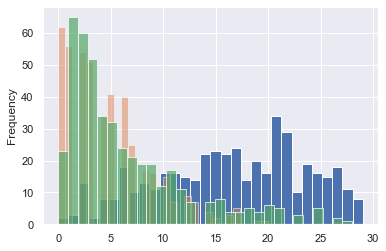

In [12]:
mv_analysis['count_0'].plot.hist(bins=30)
mv_analysis['count_1'].plot.hist(bins=30, alpha=0.5)
mv_analysis['count_2'].plot.hist(bins=30, alpha=0.7)

In [13]:
mv_analysis['count@1'] = mv_analysis.apply(lambda row: row['relevance'][0], axis=1)

In [14]:
count_at_1 = [elem[0] for elem in mv_analysis[['count@1']].values.tolist()]
num_queries = len(count_at_1)
print('Number of queries: {}'.format(num_queries))
print('Perc. of 2: {}'.format((count_at_1.count(2)/num_queries)))
print('Perc. of 1: {}'.format((count_at_1.count(1)/num_queries)))
print('Perc. of 2+1: {}'.format((count_at_1.count(2)/num_queries)+(count_at_1.count(1)/num_queries)))
print('Perc. of 0: {}'.format((count_at_1.count(0)/num_queries)))
print('Perc. of 3: {}'.format((count_at_1.count(3)/num_queries)))

Number of queries: 450
Perc. of 2: 0.6888888888888889
Perc. of 1: 0.04666666666666667
Perc. of 2+1: 0.7355555555555555
Perc. of 0: 0.14444444444444443
Perc. of 3: 0.12


# 3. Create Goldstandard

In [18]:
gs_batch = goldstandard_batch.copy()

### 3.1. Compute Metrics and Filter Queries Initially

In [19]:
gs_batch["count_0"] = gs_batch.apply(lambda row: row['relevance'].count(0), axis=1)
gs_batch["count_1"] = gs_batch.apply(lambda row: row['relevance'].count(1), axis=1)
gs_batch["count_2"] = gs_batch.apply(lambda row: row['relevance'].count(2), axis=1)
gs_batch["count_3"] = gs_batch.apply(lambda row: row['relevance'].count(3), axis=1)

In [22]:
# Rule-1: Filter queries which do not have at least n GUIs with relevance 2
print('Size before filtering of Rule-1: {}'.format(gs_batch.shape))
N = 2
gs_batch = gs_batch.loc[gs_batch['count_2'] >= N]
print('Size after filtering of Rule-1: {}'.format(gs_batch.shape))
# Rule-2: Filter queries which do not have at least two GUIs with relevance 1
print('Size before filtering of Rule-2: {}'.format(gs_batch.shape))
N = 2
gs_batch = gs_batch.loc[gs_batch['count_1'] >= N]
print('Size after filtering of Rule-2: {}'.format(gs_batch.shape))

Size before filtering of Rule-1: (450, 10)
Size after filtering of Rule-1: (362, 10)
Size before filtering of Rule-2: (362, 10)
Size after filtering of Rule-2: (279, 10)


In [24]:
gs_batch['count@1'] = gs_batch.apply(lambda row: row['relevance'][0], axis=1)

In [26]:
count_at_1 = [elem[0] for elem in gs_batch[['count@1']].values.tolist()]
num_queries = len(count_at_1)
print('Number of queries: {}'.format(num_queries))
print('Perc. of 2: {}'.format((count_at_1.count(2)/num_queries)))
print('Perc. of 1: {}'.format((count_at_1.count(1)/num_queries)))
print('Perc. of 2+1: {}'.format((count_at_1.count(2)/num_queries)+(count_at_1.count(1)/num_queries)))
print('Perc. of 0: {}'.format((count_at_1.count(0)/num_queries)))
print('Perc. of 3: {}'.format((count_at_1.count(3)/num_queries)))

Number of queries: 279
Perc. of 2: 0.7311827956989247
Perc. of 1: 0.053763440860215055
Perc. of 2+1: 0.7849462365591398
Perc. of 0: 0.1111111111111111
Perc. of 3: 0.1039426523297491


In [27]:
# Rule-3: Filter queries where the "goldstandard GUI" (index=0) has a relevance of zero
APPLY_FILTER_RULE_3 = True
if APPLY_FILTER_RULE_3:
    print('Size before filtering of Rule-3: {}'.format(gs_batch.shape))
    gs_batch = gs_batch.loc[gs_batch['count@1'].isin([1,2])]
    print('Size after filtering of Rule-3: {}'.format(gs_batch.shape))

Size before filtering of Rule-3: (279, 11)
Size after filtering of Rule-3: (219, 11)


### 3.2. Filter GUIs with High Annotator Perplexity

In [29]:
def filter_anno_1(elem):
    # Filter only the ties
    if (elem[0]==1 and elem[1]==1 and elem[2]==1):
        return True
    return False

def filter_anno_2(elem):
    # Filter the ties and the both cases where the majority vote and the remaining vote are in the extremes
    if (elem[0]==1 and elem[1]==1 and elem[2]==1):
        return True
    if (elem[0] == 2 and elem[2] == 1) or (elem[0] == 1 and elem[2] == 2):
        return True
    return False

def filter_anno_3(elem):
    # Filter the ties and the case where the majority vote for relevance 0 and the remaining vote are in the extremes
    if (elem[0]==1 and elem[1]==1 and elem[2]==1):
        return True
    if (elem[0] == 2 and elem[2] == 1):
        return True
    return False

In [ ]:
gs_batch['filter_indexes'] = gs_batch.apply(lambda row: ([index for index, elem in enumerate(row['occurances']) if filter_anno_2(elem)]), axis=1)

In [32]:
def filter_data(data, filter_indexes):
    return [elem for index, elem in enumerate(data) if index not in filter_indexes]

In [ ]:
gs_batch['annotations_list'] = gs_batch.apply(lambda row: (filter_data(row['annotations_list'], row['filter_indexes'])), axis=1)
gs_batch['gui_indexes_list'] = gs_batch.apply(lambda row: (filter_data(row['gui_indexes_list'], row['filter_indexes'])), axis=1)
gs_batch['relevance'] = gs_batch.apply(lambda row: (filter_data(row['relevance'], row['filter_indexes'])), axis=1)
gs_batch['occurances'] = gs_batch.apply(lambda row: (filter_data(row['occurances'], row['filter_indexes'])), axis=1)

### 3.3. Filter GUIs to Top-K List

In [39]:
def merge_lists(list1, list2):
    import itertools
    return [x for x in itertools.chain.from_iterable(itertools.zip_longest(list1,list2)) if x]

In [40]:
import random
import math

def filter_indexes_2(k, n_0, n_1, n_2, relevance):
    # Count indexes per relevance score
    rels_in_0 = []
    rels_in_1 = []
    rels_in_2 = []
    for index, rel in enumerate(relevance):
        if rel == 0: rels_in_0.append(index)
        elif rel == 1: rels_in_1.append(index)
        elif rel == 2: rels_in_2.append(index)
    # Shuffle the three relevance index lists
    random.Random(543).shuffle(rels_in_0)
    random.Random(543).shuffle(rels_in_1)
    random.Random(543).shuffle(rels_in_2)
    results = []
    remains = []
    # Extract samples from the three lists
    sample_0 = rels_in_0[:min(n_0, len(rels_in_0))]
    remain_0 = rels_in_0[min(n_0, len(rels_in_0)):]
    results.extend(sample_0)
    sample_1 = rels_in_1[:min(n_1, len(rels_in_1))]
    remain_1 = rels_in_1[min(n_1, len(rels_in_1)):]
    results.extend(sample_1)
    sample_2 = rels_in_2[:min(n_2, len(rels_in_2))]
    remain_2 = rels_in_2[min(n_2, len(rels_in_2)):]
    results.extend(sample_2)
    if len(results) == k:
        return results
    merged_remains = merge_lists(remain_1, remain_2)
    while merged_remains and len(results) < k:
        item = merged_remains.pop(0)
        results.append(item)
    if len(results) == k:
        return results
    else:
        return results + remain_0[:(k-len(results))]

In [41]:
def filter_data_2(data, filter_indexes):
    return [elem for index, elem in enumerate(data) if index in filter_indexes]

In [ ]:
# The number of GUIs we want to retain per query in the final gold standard
SIZE_K = 20
# The number of GUIs marked as 0 we want to retain per query in the final gold standard
SIZE_0 = 14 
# The number of GUIs marked as 1 we want to retain per query in the final gold standard
SIZE_1 = 3 
# The number of GUIs marked as 2 we want to retain per query in the final gold standard
SIZE_2 = 3 
# The method we want to use, either simple cutoff at K or sampling method
SIMPLE_CUTOFF = False

if SIMPLE_CUTOFF:
    gs_batch['annotations_list'] = gs_batch.apply(lambda row: row['annotations_list'][:SIZE_K], axis=1)
    gs_batch['gui_indexes_list'] = gs_batch.apply(lambda row: row['gui_indexes_list'][:SIZE_K], axis=1)
    gs_batch['relevance'] = gs_batch.apply(lambda row: row['relevance'][:SIZE_K], axis=1)
    gs_batch['occurances'] = gs_batch.apply(lambda row: row['occurances'][:SIZE_K], axis=1)
else:
    gs_batch['filter_indexes_2'] = gs_batch.apply(lambda row: filter_indexes_2(SIZE_K, SIZE_0, SIZE_1, SIZE_2, row['relevance']), axis=1)
    gs_batch['annotations_list'] = gs_batch.apply(lambda row: (filter_data_2(row['annotations_list'], row['filter_indexes_2'])), axis=1)
    gs_batch['gui_indexes_list'] = gs_batch.apply(lambda row: (filter_data_2(row['gui_indexes_list'], row['filter_indexes_2'])), axis=1)
    gs_batch['relevance'] = gs_batch.apply(lambda row: (filter_data_2(row['relevance'], row['filter_indexes_2'])), axis=1)
    gs_batch['occurances'] = gs_batch.apply(lambda row: (filter_data_2(row['occurances'], row['filter_indexes_2'])), axis=1)

In [ ]:
gs_batch["count_0"] = gs_batch.apply(lambda row: row['relevance'].count(0), axis=1)
gs_batch["count_1"] = gs_batch.apply(lambda row: row['relevance'].count(1), axis=1)
gs_batch["count_2"] = gs_batch.apply(lambda row: row['relevance'].count(2), axis=1)
gs_batch["count_3"] = gs_batch.apply(lambda row: row['relevance'].count(3), axis=1)

<AxesSubplot:ylabel='Frequency'>

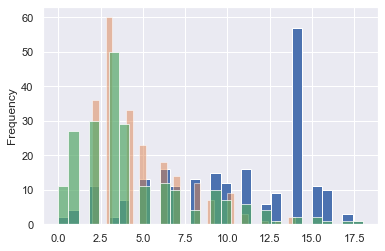

In [46]:
gs_batch['count_0'].plot.hist(bins=30)
gs_batch['count_1'].plot.hist(bins=30, alpha=0.5)
gs_batch['count_2'].plot.hist(bins=30, alpha=0.7)

In [47]:
print("Mean num. of 0: {}".format(np.mean(gs_batch['count_0'].values.tolist())))
print("Mean num. of 1: {}".format(np.mean(gs_batch['count_1'].values.tolist())))
print("Mean num. of 2: {}".format(np.mean(gs_batch['count_2'].values.tolist())))
print("Mean num. of 3: {}".format(np.mean(gs_batch['count_3'].values.tolist())))

Mean num. of 0: 10.10958904109589
Mean num. of 1: 4.748858447488584
Mean num. of 2: 4.465753424657534
Mean num. of 3: 0.0


### 3.4. Filter Queries Final

In [49]:
# Rule-0: Filter queries which do not have at least k GUIs left
print('Size before filtering of Rule-1: {}'.format(gs_batch.shape))
gs_batch = gs_batch.loc[np.array(list(map(len, gs_batch['relevance'].values))) >= 20]
print('Size after filtering of Rule-1: {}'.format(gs_batch.shape))

Size before filtering of Rule-1: (219, 13)
Size after filtering of Rule-1: (179, 13)


In [50]:
# Rule-1: Filter queries which do not have at least n GUIs with relevance 2 and
print('Size before filtering of Rule-1: {}'.format(gs_batch.shape))
N = 2
M = 8
gs_batch = gs_batch.loc[(gs_batch['count_2'] >= N) & (gs_batch['count_2'] <= M)]
print('Size after filtering of Rule-1: {}'.format(gs_batch.shape))
# Rule-2: Filter queries which do not have at least two GUIs with relevance 1
print('Size before filtering of Rule-2: {}'.format(gs_batch.shape))
N = 2
M = 8
gs_batch = gs_batch.loc[(gs_batch['count_1'] >= N) & (gs_batch['count_1'] <= M)]
print('Size after filtering of Rule-2: {}'.format(gs_batch.shape))

Size before filtering of Rule-1: (179, 13)
Size after filtering of Rule-1: (121, 13)
Size before filtering of Rule-2: (121, 13)
Size after filtering of Rule-2: (108, 13)


In [52]:
# Take a random sample from the remaining 108 queries to reduce it to 100
SIZE_GOLDSTANDARD = 100
RANDOM_STATE = 476
gs_final = gs_batch.sample(n=SIZE_GOLDSTANDARD, random_state=RANDOM_STATE)

In [54]:
gs_final_minified = gs_final[['Input.query', 'gui_indexes_list', 'relevance']]
gs_final_minified = gs_final_minified.rename(columns={"Input.query": "query", 'gui_indexes_list':'gui_indexes'})

### 3.5. Goldstandard Metrics

In [56]:
gs_final.shape

(100, 13)

In [58]:
print("Mean num. of 0: {}".format(np.mean(gs_final['count_0'].values.tolist())))
print("Mean num. of 1: {}".format(np.mean(gs_final['count_1'].values.tolist())))
print("Mean num. of 2: {}".format(np.mean(gs_final['count_2'].values.tolist())))

Mean num. of 0: 12.14
Mean num. of 1: 4.15
Mean num. of 2: 3.71


In [ ]:
all_annotation_counts = []
for row in gs_final[["occurances"]].iterrows():
    all_annotation_counts.extend([elem for index, elem in enumerate(row[1].values[0])])
print(all_annotation_counts)

In [60]:
import krippendorff

print("Number of examples: {}".format(len(all_annotation_counts)))
krippendorff.alpha(value_counts=np.array(all_annotation_counts), level_of_measurement="ordinal")

Number of examples: 2000


0.667456393220178

### 3.6. Save Goldstandard

In [61]:
abs_path_save = '../data/gui_ranking/goldstandard/'
gs_final_minified.to_csv(abs_path_save+'goldstandard.csv', index=False)

## 4. Create Training Data

In [62]:
goldstandard_batch.shape

(450, 6)

In [65]:
gs_final.shape

(100, 13)

In [66]:
goldstandard_queries = [elem[0] for elem in gs_final[['Input.query']].values.tolist()]

In [67]:
train = goldstandard_batch.copy()
train = train[~train['Input.query'].isin(goldstandard_queries)]

In [70]:
train.shape

(350, 6)

In [71]:
train_minified = train[['Input.query', 'gui_indexes_list', 'relevance']]
train_minified = train_minified.rename(columns={"Input.query": "query", 'gui_indexes_list':'gui_indexes'})

In [72]:
abs_path_save = '../data/gui_ranking/training/'
train_minified.to_csv(abs_path_save+'train.csv', index=False)

### 4.1 Generate Training Data Format for BERT-LTR Models

In [135]:
DATA_ACTIVITY_NAME = 'activity_name'
DATA_TEXT_VISIBLE = 'text-visible'
DATA_TEXT_INVISIBLE = 'text-invisible'
DATA_RES_IDS_VISIBLE = 'res-ids-visible'
DATA_RES_IDS_INVISIBLE = 'res-ids-invisible'
DATA_ICON_IDS = 'icon-ids'
DATA_ALL = 'text-all'

In [137]:
# Load the preprocessed GUI text documents
abs_path = '../webapp/gui2rapp/staticfiles/resources/preproc_text/dataset_new_stem_F_stpw_T_filter_T.csv'
dataset = pd.read_csv(abs_path)
dataset.loc[:, DATA_ACTIVITY_NAME] = dataset.loc[:, DATA_ACTIVITY_NAME].apply(lambda x: literal_eval(x))
dataset.loc[:, DATA_TEXT_VISIBLE] = dataset.loc[:, DATA_TEXT_VISIBLE].apply(lambda x: literal_eval(x))
dataset.loc[:, DATA_TEXT_INVISIBLE] = dataset.loc[:, DATA_TEXT_INVISIBLE].apply(lambda x: literal_eval(x))
dataset.loc[:, DATA_RES_IDS_VISIBLE] = dataset.loc[:, DATA_RES_IDS_VISIBLE].apply(lambda x: literal_eval(x))
dataset.loc[:, DATA_RES_IDS_INVISIBLE] = dataset.loc[:, DATA_RES_IDS_INVISIBLE].apply(lambda x: literal_eval(x))
dataset.loc[:, DATA_ICON_IDS] = dataset.loc[:, DATA_ICON_IDS].apply(lambda x: literal_eval(x))
dataset.loc[:, DATA_ALL] = dataset.loc[:, DATA_ALL].apply(lambda x: literal_eval(x))

In [156]:
MAX_TOKENS_DOC = 100
train_queries = []
for index, row in train.iterrows():
    query = row['Input.query']
    documents = []
    for gui_index, relevance in zip(row['gui_indexes_list'], row['relevance']):
        if relevance != 3:
            text_all = dataset[dataset['filename'] == (str(gui_index) + '.json')]['text-all'].item()
            doc_text = ' '.join(text_all[:MAX_TOKENS_DOC])
            documents.append({'relevance': relevance, 'docText': doc_text})
    train_queries.append({'queryText': query, 'documents': documents})

In [166]:
ranking_problems_full = {'rankingProblems': train_queries}

In [167]:
import json

abs_path = '../data/gui_ranking/bert_models/training_bert_format/gui_ranking_train_full.json'

with open(abs_path, 'w') as f:
    json.dump(ranking_problems_full, f, indent=4)

# 5. Transform Gold Standard to BERT Prediction Format


In [226]:
MAX_TOKENS_DOC = 100
inverted_index_guis = {}
gs_queries = []
for index, row in gs_final_minified.iterrows():
    query = row['query']
    documents = []
    for gui_index, relevance in zip(row['gui_indexes'], row['relevance']):
        text_all = dataset[dataset['filename'] == (str(gui_index) + '.json')]['text-all'].item()
        doc_text = ' '.join(text_all[:MAX_TOKENS_DOC])
        if inverted_index_guis.get(doc_text):
            if gui_index not in inverted_index_guis[doc_text]:
                inverted_index_guis[doc_text].append(gui_index)
        else:
            inverted_index_guis[doc_text] = [gui_index]
        documents.append({'relevance': relevance, 'docText': doc_text})
    gs_queries.append({'queryText': query, 'documents': documents})
ranking_problems_gs = {'rankingProblems': gs_queries}

In [181]:
import json

abs_path = '../data/gui_ranking/bert_models/goldstandard_bert_format/gui_ranking_eval_goldstandard.json'

with open(abs_path, 'w') as f:
    json.dump(ranking_problems_gs, f, indent=4)

# 6. Transform BERT Predictions to GUI Ordering Format

In [286]:
abs_path = '../data/gui_ranking/bert_models/gui_ranking_goldstandard_results.json'

with open(abs_path) as jsonfile:
    bert_predictions = json.load(jsonfile)

In [289]:
dataframe_predictions = pd.DataFrame()
for query in bert_predictions['rankingProblemsOutput']:
    query_text = query['queryText']
    gui_ranking = []
    for doc in query['documents']:
        indexes = inverted_index_guis[doc['docText']]
        gs_index_list = gs_final_minified[gs_final_minified['query'] == query_text]['gui_indexes'].values.tolist()[0]
        for index in indexes:
            if index in gs_index_list and index not in gui_ranking:
                gui_ranking.append(index)
                break
    if len(gui_ranking) != 20:
        print(query_text)
    result = {'query': query_text, 'gui_ranking': gui_ranking}
    dataframe_predictions = dataframe_predictions.append(result, ignore_index=True)

In [291]:
abs_path = '../data/gui_ranking/bert_models/predictions.csv'
dataframe_predictions.to_csv(abs_path, index=False)